In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# importing data
income_data = pd.read_csv('income.csv')

#creating a copy of original data
data = income_data.copy(deep=True)

In [4]:
print(data.head())

   age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-

# EDA
- Getting to know the data.
- Data preprocessing (missing values).
- Cross tables and data Visualisation.

## Getting to know the data

In [5]:
# To check variables' data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [6]:
# check for missing values
print(data.isnull().sum())

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [7]:
# no missing values

In [8]:
# statistical summary of numerical variables

In [9]:
print(data.describe())

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
# statistical summary of categorical variables
print(data.describe(include='O'))

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [11]:
data['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
data['EdType'].value_counts()

EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64

In [13]:
data['maritalstatus'].value_counts()

maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64

In [14]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [15]:
data['relationship'].value_counts()

relationship
 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: count, dtype: int64

In [16]:
data['race'].value_counts()

race
 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: count, dtype: int64

In [17]:
data['gender'].value_counts()

gender
 Male      21370
 Female    10608
Name: count, dtype: int64

In [18]:
data['nativecountry'].value_counts()

nativecountry
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                 

In [19]:
data['SalStat'].value_counts()

SalStat
 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: count, dtype: int64

In [20]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [21]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [22]:
np.unique(data['SalStat'])

array([' greater than 50,000', ' less than or equal to 50,000'],
      dtype=object)

In [23]:
# replace junk values with na n
data = pd.read_csv('income.csv',na_values=[' ?'])

## Data preprocessing

In [24]:
# checking for missing values
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [25]:
# check the pattern of missing values
missing = data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [26]:
# remove all the rows having at least one column missing
data2 = data.dropna(axis=0)

In [27]:
data2.shape

(30162, 13)

In [28]:
data3 = data.select_dtypes(exclude=[object])

In [29]:
# Relationship b/w independent variables
correlation = data3.corr()

In [30]:
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000


In [31]:
# none of the numerical variables are corelated with each other

## Cross tables & Data Visualization

In [32]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [33]:
# gender frequency distribution table
pd.crosstab(index = data2['gender'],
           columns = 'count')

col_0,count
gender,
Female,9782
Male,20380


In [34]:
# proportion table
pd.crosstab(index = data2['gender'],
            columns = 'count',
            normalize = True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [35]:
# Gender vs Salary Status:
# Two-way table
pd.crosstab(index = data2['gender'],
            columns = data2['SalStat'],
            margins = True,
            normalize = 'index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='SalStat'>

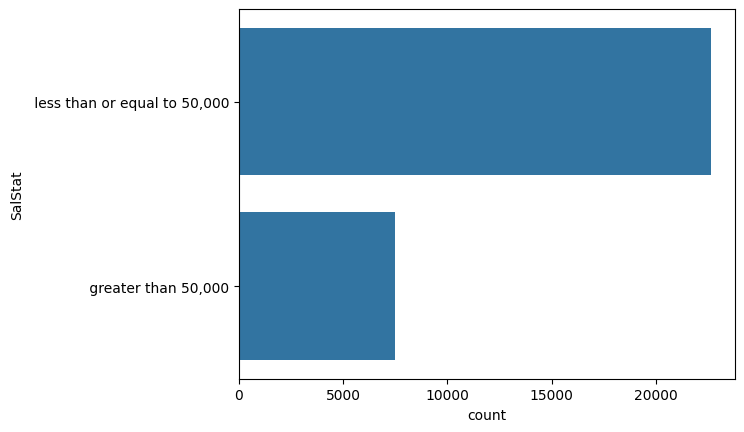

In [36]:
# frequency distribution of 'salary status'
sns.countplot(data2['SalStat'])

In [37]:
# Around 75% people's salary status is <= 50,000
# & 25% people's salary status is > 50,000

In [38]:
#######################   Histogram of Age   #######################

<Axes: xlabel='age', ylabel='Count'>

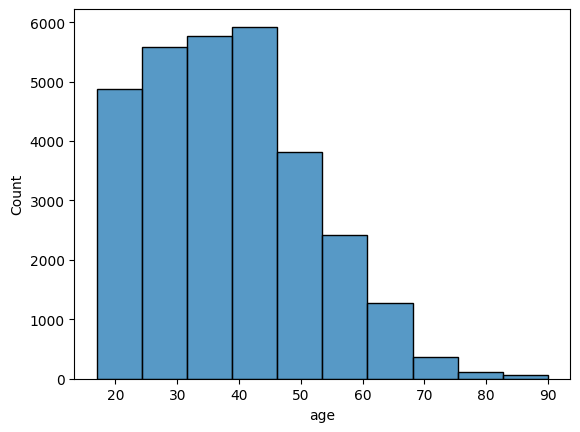

In [39]:
sns.histplot(data2['age'],bins=10)

In [40]:
# people of age group 20-45 are high in number

In [41]:
########################    Box Plot - Age vs Salary status    ######################

<Axes: xlabel='SalStat', ylabel='age'>

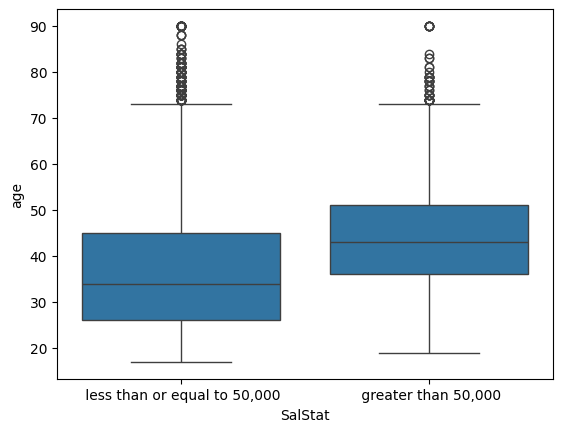

In [42]:
sns.boxplot(x=data2['SalStat'], y=data2['age'])

In [43]:
# people of age group 25-45 earn less than or equal to 50,000
# people of age group 35-50 earn more than 50,000

<Axes: xlabel='count', ylabel='JobType'>

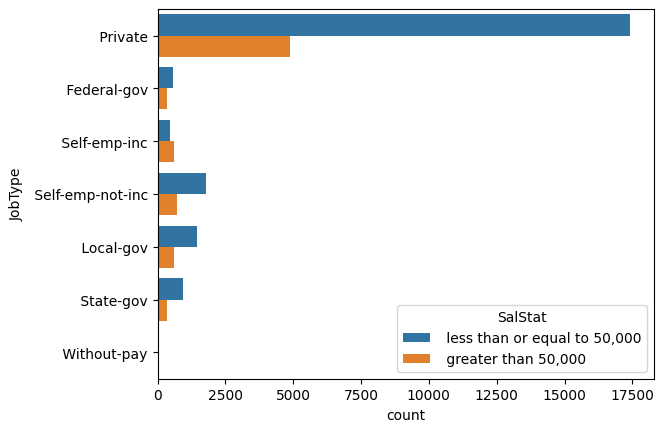

In [44]:
# Job Type vs. Salary Status
# grouped bar plot
sns.countplot(y='JobType',data=data2,hue='SalStat')

In [45]:
pd.crosstab(index=data2['JobType'],
           columns=data2['SalStat'],
           normalize='index').round(4)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.71,61.29
Local-gov,29.46,70.54
Private,21.88,78.12
Self-emp-inc,55.87,44.13
Self-emp-not-inc,28.57,71.43
State-gov,26.90,73.10
Without-pay,0.00,100.00


<Axes: xlabel='count', ylabel='EdType'>

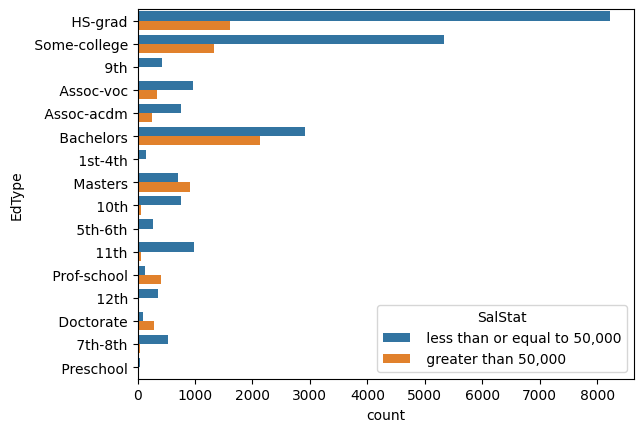

In [46]:
# Education vs Salary Status
sns.countplot(y='EdType',data=data2,hue='SalStat')

In [47]:
pd.crosstab(index=data2['EdType'],
           columns=data2['SalStat'],
           normalize='index').round(3)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


<Axes: xlabel='count', ylabel='occupation'>

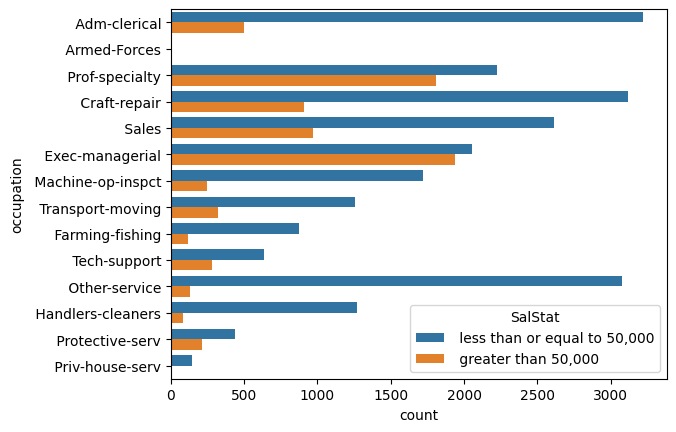

In [48]:
# occupation vs salary status
sns.countplot(y='occupation',data=data2,hue='SalStat')

In [49]:
pd.crosstab(index=data2['occupation'],
           columns=data2['SalStat'],
           normalize='index').round(3)*100

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


<Axes: xlabel='capitalgain', ylabel='Count'>

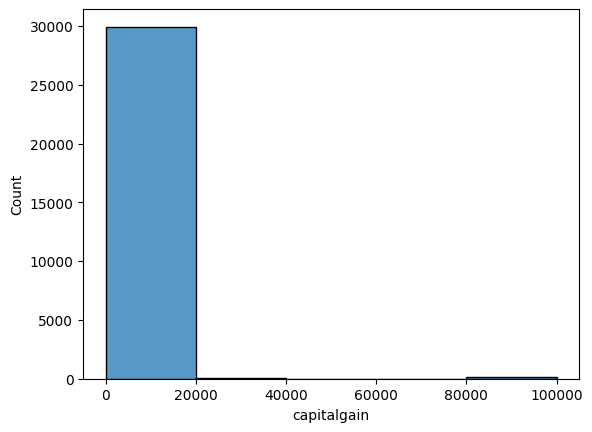

In [50]:
# Capital Gain
sns.histplot(x='capitalgain', data=data2, bins=5)

<Axes: xlabel='capitalloss', ylabel='Count'>

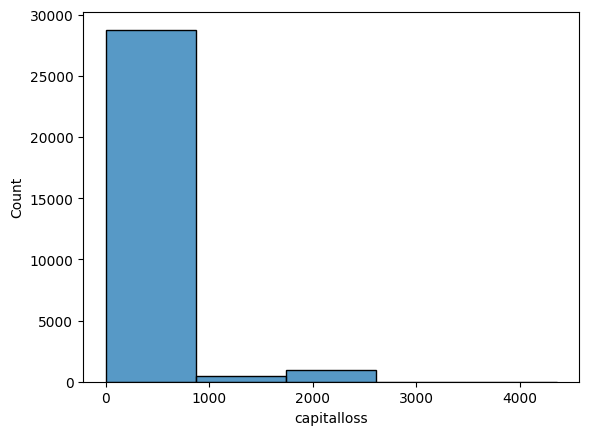

In [51]:
# Capital loss
sns.histplot(x='capitalloss', data=data2,bins=5)

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

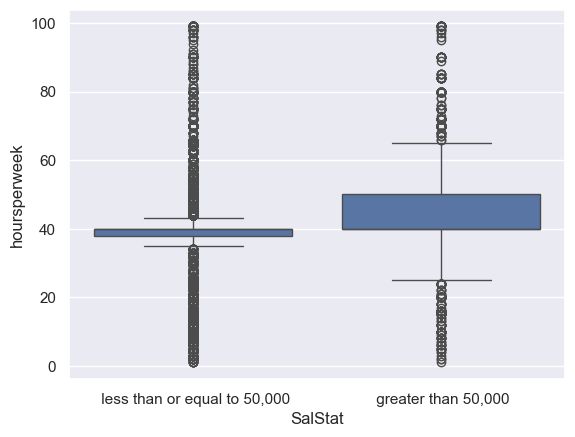

In [52]:
# Hours per week vs salary status
sns.set(style='darkgrid')
sns.boxplot(x='SalStat', y='hoursperweek', data=data2)

In [53]:
# People who work for 40-50 hours a week are likely to have a salary greater than 50000

# Logistic Regression

In [76]:
# Reindexing the salary status names to 0 and 1

In [54]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})

C:\Users\ragha\AppData\Local\Temp\ipykernel_2724\714139972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})


In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [56]:
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [57]:
new_data = pd.get_dummies(data2,drop_first=True)

In [58]:
new_data = new_data.replace({True: 1, False: 0})

In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 31977
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   capitalgain                                30162 non-null  int64
 2   capitalloss                                30162 non-null  int64
 3   hoursperweek                               30162 non-null  int64
 4   SalStat                                    30162 non-null  int64
 5   JobType_ Local-gov                         30162 non-null  int64
 6   JobType_ Private                           30162 non-null  int64
 7   JobType_ Self-emp-inc                      30162 non-null  int64
 8   JobType_ Self-emp-not-inc                  30162 non-null  int64
 9   JobType_ State-gov                         30162 non-null  int64
 10  JobType_ Without-pay                       30162 no

In [60]:
print(new_data.head())

   age  capitalgain  capitalloss  hoursperweek  SalStat  JobType_ Local-gov  \
0   45            0            0            28        0                   0   
1   24            0            0            40        0                   0   
2   44            0            0            40        1                   0   
3   27            0            0            40        0                   0   
4   20            0            0            35        0                   0   

   JobType_ Private  JobType_ Self-emp-inc  JobType_ Self-emp-not-inc  \
0                 1                      0                          0   
1                 0                      0                          0   
2                 1                      0                          0   
3                 1                      0                          0   
4                 1                      0                          0   

   JobType_ State-gov  ...  nativecountry_ Portugal  \
0                   0  ...     

In [61]:
# storing the column names
columns_list = list(new_data.columns)

In [62]:
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [63]:
features = list(set(columns_list)-set(['SalStat']))

In [65]:
# storing the output values in y
y = new_data['SalStat'].values

In [66]:
print(y)

[0 0 1 ... 0 0 0]


In [67]:
x = new_data[features].values

In [77]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
# splitting the data into train and test data
train_x,test_x,train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
# Make an instance of the model
logistic = LogisticRegression()

In [78]:
# fitting the values for x and y

In [70]:
logistic.fit(train_x,train_y)

C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
logistic.coef_

array([[-2.25562898e-02, -2.17783735e-02, -1.29092117e-02,
         1.17529019e-01, -1.20978265e-02, -3.94341905e-01,
        -2.64167615e-02, -1.27378345e-01, -2.24811111e-03,
         1.62340236e-01, -3.30716068e-03,  1.91509588e-03,
         1.12610152e+00, -3.19733118e-01, -3.50731174e-01,
        -8.14721729e-03, -1.72732986e-01, -7.18417658e-02,
         5.26860064e-01, -1.79172230e-01, -2.57583014e-02,
        -8.22849366e-03, -5.97589571e-02, -5.85544368e-01,
        -9.33375275e-01, -7.39920019e-01, -2.50721389e-01,
        -8.37065070e-03, -2.04403675e-02, -7.43236259e-03,
        -4.14714158e-02, -3.97378194e-02,  6.70138698e-04,
         1.65526926e-02,  5.71867838e-03, -3.86400690e-02,
        -8.41545871e-02, -1.40656409e-01, -5.74890644e-01,
        -6.17132463e-03,  1.60979519e-01, -4.06118143e-02,
         3.58137672e-03,  2.48738211e-01, -4.49388739e-03,
        -2.44501024e-01,  2.85998485e-05, -3.91234639e-01,
         2.34143576e-01, -1.90771936e-03, -9.71331754e-0

In [72]:
logistic.intercept_

array([-1.03973947])

In [73]:
prediction = logistic.predict(test_x)

In [74]:
print(prediction)

[0 0 0 ... 0 0 0]


In [75]:
confusion_mat = confusion_matrix(test_y,prediction)
print(confusion_mat)

[[6293  530]
 [ 954 1272]]


In [79]:
# diagonal values gives the no. of correct predictions
# off diagonal values gives the no. of wrong predictions
# rows represents the classes

In [80]:
# calculating the accuracy
acc_score = accuracy_score(test_y,prediction)
print(acc_score)

0.8360039783401481


In [81]:
# printing the no. misclassified samples
print('Misclassified samples : ', (test_y!=prediction).sum())

Misclassified samples :  1484


In [82]:
# IMPROVING THE ACCURACY

# LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

In [84]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [85]:
# removing insignificant variables
cols = ['gender', 'nativecountry', 'race', 'JobType']
new_data = data2.drop(cols,axis=1)

In [86]:
new_data.columns

Index(['age', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat'],
      dtype='object')

In [87]:
new_data = pd.get_dummies(new_data,drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  EdType_ 11th  \
0       45            0            0            28        0         False   
1       24            0            0            40        0         False   
2       44            0            0            40        1         False   
3       27            0            0            40        0         False   
4       20            0            0            35        0         False   
...    ...          ...          ...           ...      ...           ...   
31973   34          594            0            60        0         False   
31974   34            0            0            40        0         False   
31975   23            0            0            40        0         False   
31976   42            0            0            40        0         False   
31977   29            0            0            40        0         False   

       EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  EdType_ 7th-8th  ...

In [88]:
new_data = new_data.replace({True:1,False:0})

In [89]:
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  EdType_ 11th  \
0       45            0            0            28        0             0   
1       24            0            0            40        0             0   
2       44            0            0            40        1             0   
3       27            0            0            40        0             0   
4       20            0            0            35        0             0   
...    ...          ...          ...           ...      ...           ...   
31973   34          594            0            60        0             0   
31974   34            0            0            40        0             0   
31975   23            0            0            40        0             0   
31976   42            0            0            40        0             0   
31977   29            0            0            40        0             0   

       EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  EdType_ 7th-8th  ...

In [90]:
# storing the column names
columns_list = list(new_data.columns)

In [92]:
#separating the features and target variable
features = list(set(columns_list)-set(['SalStat']))

In [93]:
print(features)

['EdType_ Some-college', 'occupation_ Tech-support', 'EdType_ Preschool', 'relationship_ Own-child', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Never-married', 'capitalgain', 'EdType_ Bachelors', 'EdType_ 12th', 'occupation_ Machine-op-inspct', 'occupation_ Protective-serv', 'EdType_ 9th', 'EdType_ 1st-4th', 'EdType_ Masters', 'maritalstatus_ Separated', 'EdType_ Assoc-acdm', 'hoursperweek', 'EdType_ HS-grad', 'occupation_ Transport-moving', 'occupation_ Other-service', 'EdType_ 7th-8th', 'capitalloss', 'occupation_ Exec-managerial', 'maritalstatus_ Married-AF-spouse', 'occupation_ Sales', 'relationship_ Not-in-family', 'EdType_ Assoc-voc', 'occupation_ Craft-repair', 'occupation_ Handlers-cleaners', 'EdType_ 5th-6th', 'relationship_ Unmarried', 'occupation_ Priv-house-serv', 'maritalstatus_ Married-spouse-absent', 'occupation_ Prof-specialty', 'EdType_ Doctorate', 'relationship_ Wife', 'EdType_ 11th', 'relationship_ Other-relative', 'age', 'occupation_ Farming-fishing', 'EdT

In [94]:
# storing target variable values
y = new_data['SalStat'].values

In [95]:
print(y)

[0 0 1 ... 0 0 0]


In [96]:
x = new_data[features].values

In [97]:
# split into test and train data
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [99]:
#make an instance of logistic regression
logistic = LogisticRegression()

In [101]:
# fitting the values for x and y
logistic.fit(train_x,train_y)

C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
# prediction from test data
prediction = logistic.predict(test_x)

In [103]:
# calculating the accuracy
acc_score = accuracy_score(test_y,prediction)
print(acc_score)

0.8344568460603382


In [104]:
print('Missclassified samples: ',(test_y != prediction).sum())

Missclassified samples:  1498


# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
# storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [107]:
# fitting the values for X and Y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [108]:
# predicting the test vales with model
prediction = KNN_classifier.predict(test_x)

In [109]:
# performance metric check
confusion_mat = confusion_matrix(test_y,prediction)

In [110]:
print(confusion_mat)

[[6188  635]
 [ 855 1371]]


In [111]:
# accuracy score
acc_score = accuracy_score(test_y,prediction)

In [112]:
print(acc_score)

0.835340921648801


In [113]:
print("Missclassified samples: ",(test_y!=prediction).sum())

Missclassified samples:  1490
